# Team `Name Undecided`

In [4]:
!pip install --quiet vaderSentiment
!pip install --quiet pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
import seaborn as sns
from matplotlib import pyplot as plt

## EDA

In [ ]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("notebook")

### DJIA dataset

In [ ]:
DJIA = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/upload_DJIA_table.csv',
                   index_col='Date', parse_dates=['Date'])

In [ ]:
DJIA = DJIA.sort_index()

In [ ]:
DJIA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:
DJIA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
DJIA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
DJIA.duplicated().sum() # Check if there are duplicated data

0

In [ ]:
DJIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


Text(0.5, 0, 'Date')

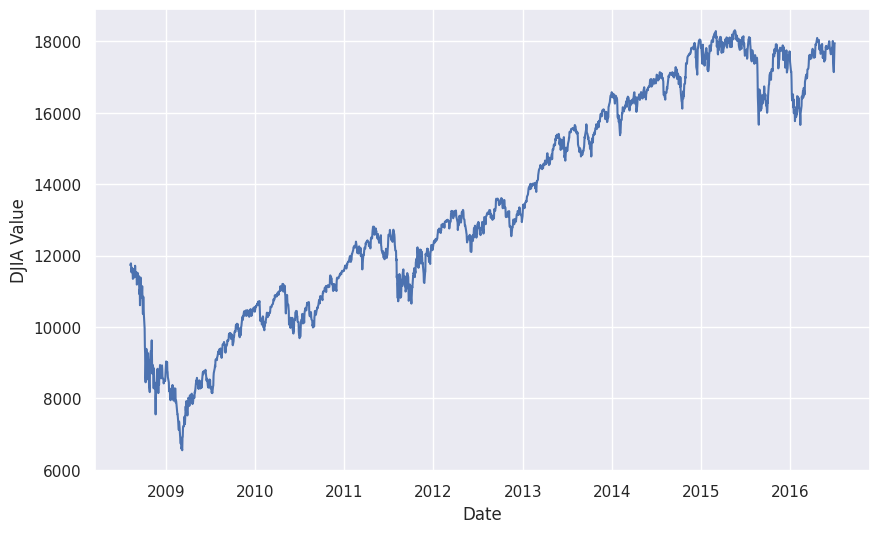

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(DJIA['Adj Close'])
plt.ylabel('DJIA Value')
plt.xlabel('Date')

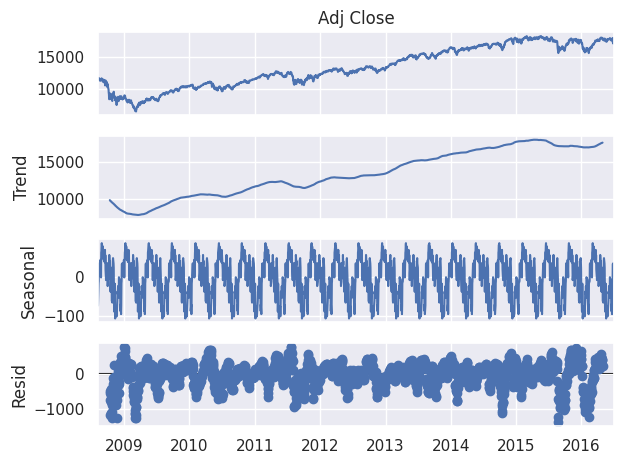

In [ ]:
DJIA_decomposition = sm.tsa.seasonal_decompose(DJIA['Adj Close'], model='additive', period=90)
fig = DJIA_decomposition.plot()
plt.show()

### Top News Datasets

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
news = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/Combined_News_DJIA.csv')

In [ ]:
news.shape

(1989, 27)

In [ ]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",b'breaking: musharraf to be impeached.',b'russia today: columns of troops roll into so...,b'russian tanks are moving towards the capital...,"b""afghan children raped with 'impunity,' u.n. ...",b'150 russian tanks have entered south ossetia...,"b""breaking: georgia invades south ossetia, rus...","b""the 'enemy combatent' trials are nothing but...",...,b'georgia invades south ossetia - if russia ge...,b'al-qaeda faces islamist backlash',"b'condoleezza rice: ""the us would not act to p...",b'this is a busy day: the european union has ...,"b""georgia will withdraw 1,000 soldiers from ir...",b'why the pentagon thinks attacking iran is a ...,b'caucasus in crisis: georgia invades south os...,b'indian shoe manufactory - and again in a se...,b'visitors suffering from mental illnesses ban...,"b""no help for mexico's kidnapping surge"""
1,2008-08-11,1,b'why wont america and nato help us? if they w...,b'bush puts foot down on georgian conflict',"b""jewish georgian minister: thanks to israeli ...",b'georgian army flees in disarray as russians ...,"b""olympic opening ceremony fireworks 'faked'""",b'what were the mossad with fraudulent new zea...,b'russia angered by israeli military sale to g...,b'an american citizen living in s.ossetia blam...,...,b'israel and the us behind the georgian aggres...,"b'""do not believe tv, neither russian nor geor...",b'riots are still going on in montreal (canada...,b'china to overtake us as largest manufacturer',b'war in south ossetia [pics]',b'israeli physicians group condemns state tort...,b' russia has just beaten the united states ov...,b'perhaps *the* question about the georgia - r...,b'russia is so much better at war',"b""so this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,"b""russia 'ends georgia operation'""","b'""if we had no sexual harassment we would hav...","b""al-qa'eda is losing support in iraq because ...",b'ceasefire in georgia: putin outmaneuvers the...,b'why microsoft and intel tried to kill the xo...,b'stratfor: the russo-georgian war and the bal...,"b""i'm trying to get a sense of this whole geor...",...,b'u.s. troops still in georgia (did you know t...,b'why russias response to georgia was right',"b'gorbachev accuses u.s. of making a ""serious ...","b'russia, georgia, and nato: cold war two'",b'remember that adorable 62-year-old who led y...,b'war in georgia: the israeli connection',b'all signs point to the us encouraging georgi...,b'christopher king argues that the us and nato...,b'america: the new mexico?',"b""bbc news | asia-pacific | extinction 'by man..."
3,2008-08-13,0,b' u.s. refuses israel weapons to attack iran:...,"b""when the president ordered to attack tskhinv...",b' israel clears troops who killed reuters cam...,b'britain\'s policy of being tough on drugs is...,b'body of 14 year old found in trunk; latest (...,b'china has moved 10 *million* quake survivors...,"b""bush announces operation get all up in russi...",b'russian forces sink georgian ships ',...,b'elephants extinct by 2020?',b'us humanitarian missions soon in georgia - i...,"b""georgia's ddos came from us sources""","b'russian convoy heads into georgia, violating...",b'israeli defence minister: us against strike ...,b'gorbachev: we had no choice',b'witness: russian forces head towards tbilisi...,b' quarter of russians blame u.s. for conflict...,b'georgian president says us military will ta...,b'2006: nobel laureate aleksander solzhenitsyn...
4,2008-08-14,1,b'all the experts admit that we should legalis...,b'war in south osetia - 89 pictures made by a ...,b'swedish wrestler ara abrahamian throws away ...,b'russia exaggerated the death toll in south o...,b'missile that killed 9 inside pakistan may ha...,"b""rushdie condemns random house's refusal to p...",b'poland and us agree 

In [ ]:
news.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

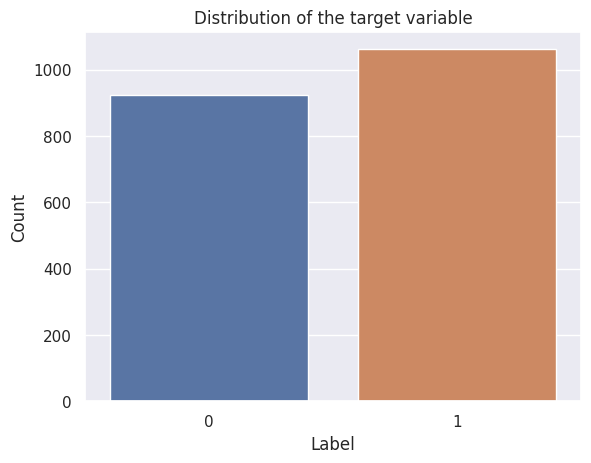

In [ ]:
sns.countplot(x='Label', data=news)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

## NLP & ML for news data

### Data Preprocessing

In [ ]:
# Remove null data
news.dropna(inplace=True)
print(news.isnull().sum().sum())

0


In [ ]:
text_columns = [col for col in news.columns if col.startswith('Top')]
# Remove the 'b' letter in beginniing of all news
news[text_columns] = news[text_columns].apply(lambda x: x.str[1:])
# Set all text to lowercase
news[text_columns] = news[text_columns].apply(lambda x: x.str.lower())

In [ ]:
'''
Stemming or lemmatizing the words
Lemmatization, reduces words to their base form using morphological analysis, which results in a meaningful word.
For example, the word "running" may be reduced to "run".
Lemmatization is more accurate but slower and more resource-intensive compared to stemming.
'''
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

news[text_columns] = news[text_columns].apply(lambda x: x.apply(lemmatize_words))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Removing stopwords
from nltk.corpus import stopwords

# Download the stopwords and punkt corpora from nltk
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Create a set of English stop words
    stop_words = set(stopwords.words("english"))

    # Tokenize the input text into words
    words = nltk.word_tokenize(text)

    # Convert words to lowercase and remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Join the words back into a single string
    return " ".join(words)

# Loop through all columns in the dataframe
for col in news.columns:
    # Check if the column data type is object
    if news[col].dtype == 'object':
        # Apply the remove_stopwords function to the column if the value is a string
        news[col] = news[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Removing punctuation
import string

# Define a function to remove punctuation from a string
def remove_punctuation(text):
    # Create a string of all ASCII punctuation characters
    punctuation = string.punctuation
    # Use translate method to remove all punctuation characters from the text
    text = text.translate(str.maketrans("", "", punctuation))
    return text

# Loop through all columns in the dataframe
for col in news.columns:
    # Check if the column data type is object (e.g. string)
    if news[col].dtype == 'object':
        # Apply the remove_punctuation function to each string value in the column
        news[col] = news[col].apply(lambda x: remove_punctuation(x) if type(x) == str else x)

In [ ]:
# Remove untextual data URLs, numbers and special characters
def remove_non_textual(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove special characters
    return text

for col in news.columns:
    if news[col].dtype == 'object':
        news[col] = news[col].apply(lambda x: remove_non_textual(x) if type(x) == str else x)

In [ ]:
# tokenize the text in all columns and store the result in a new column with the same name + "_tokenized"
for col in text_columns:
    news[col + '_tokenized'] = news[col].apply(word_tokenize)

# show the first 5 rows of the new columns
print(news[[col + '_tokenized' for col in text_columns]].head())

                                      Top1_tokenized  \
0  [georgia, downs, two, russian, warplanes, coun...   
1  [why, wont, america, nato, help, us, wont, hel...   
2  [remember, adorable, yearold, sang, opening, c...   
3  [us, refuse, israel, weapon, attack, iran, rep...   
4               [all, expert, admit, legalise, drug]   

                                      Top2_tokenized  \
0                   [breaking, musharraf, impeached]   
1              [bush, put, foot, georgian, conflict]   
2                 [russia, ends, georgia, operation]   
3  [president, ordered, attack, tskhinvali, capit...   
4  [war, south, osetia, picture, made, russian, s...   

                                      Top3_tokenized  \
0  [russia, today, column, troop, roll, south, os...   
1  [jewish, georgian, minister, thanks, israeli, ...   
2              [sexual, harassment, would, children]   
3  [israel, clear, troop, killed, reuters, camera...   
4  [swedish, wrestler, ara, abrahamian, throw,

### Feature Extraction

In [ ]:
columns = ['Label','Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized', 'Top4_tokenized', 'Top5_tokenized',
           'Top6_tokenized', 'Top7_tokenized', 'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',
           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized', 'Top14_tokenized', 'Top15_tokenized',
           'Top16_tokenized', 'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized', 'Top20_tokenized',
           'Top21_tokenized', 'Top22_tokenized', 'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
df = news[columns]

The aim of count-based methods is to convert the text data into numerical features that can be used in machine learning algorithms. One of the most popular count-based methods is TF-IDF (term frequency-inverse document frequency).

The idea behind TF-IDF is to weight the words based on how frequent they are in the document, and how rare they are in the entire corpus. This helps to give more importance to the words that are unique to a particular document, and less importance to the words that are common across all documents.

The resulting features are the TF-IDF scores for each word in the corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(dataframe):
    tfidf = TfidfVectorizer(min_df=2)  # minimum document frequency to consider a word
    features = tfidf.fit_transform(dataframe)
    feature_names = tfidf.get_feature_names_out()
    return features, feature_names

# Apply TF-IDF to all columns with text data
for col in df.columns:
    if df[col].dtype == 'object':
        text = df[col].apply(str)  # convert pandas series to list of strings
        features, feature_names = tfidf_features(text)
        df_tfidf = pd.DataFrame(features.todense(), columns=feature_names)
        df = pd.concat([df, df_tfidf], axis=1)

### ML based on text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
columns = ['Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized', 'Top4_tokenized', 'Top5_tokenized',
           'Top6_tokenized', 'Top7_tokenized', 'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',
           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized', 'Top14_tokenized', 'Top15_tokenized',
           'Top16_tokenized', 'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized', 'Top20_tokenized',
           'Top21_tokenized', 'Top22_tokenized', 'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
text_data = news[columns]

In [ ]:
text_data['Label'] = news['Label']

<ipython-input-85-f2211e07e262>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Label'] = news['Label']


In [ ]:
for col in text_data.columns:
    if text_data[col].dtype == 'object':
        text = text_data[col].apply(str)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF vectorizing
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
y = text_data.Label

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.29898404518554184
Mean Absolute Error: 0.47655204080891167
R-squared: -0.20030080070888756


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
threshold = 0.5
y_pred_bi = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_bi)
precision = precision_score(y_test, y_pred_bi)
recall = recall_score(y_test, y_pred_bi)
f1 = f1_score(y_test, y_pred_bi)

print(f'Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

Accuracy: 0.5477386934673367
precision: 0.5720930232558139
recall: 0.5829383886255924
f1: 0.5774647887323944


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
columns = ['Label','Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized', 'Top4_tokenized', 'Top5_tokenized',
           'Top6_tokenized', 'Top7_tokenized', 'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',
           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized', 'Top14_tokenized', 'Top15_tokenized',
           'Top16_tokenized', 'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized', 'Top20_tokenized',
           'Top21_tokenized', 'Top22_tokenized', 'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
text_data = news[columns]
# combine all the text data into a single string for each row
text_data = text_data.apply(lambda x: " ".join(str(x) for x in x), axis=1)

# perform count vectorization to convert text into numerical data
vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=2)
X = vectorizer.fit_transform(text_data)

# extract the target variable
y = news["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define the models to be trained
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
model_names = ["Logistic Regression", "Support Vector Classifier", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Decision Tree"]

results=[]

# Train each model and get predictions
for model, model_name in zip(models, model_names):
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)

    # Calculate evaluation metrics for each model
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)

    # Store the results of each model in the results list
    results.append((model_name, accuracy, precision, recall, f1))

# Print the results
for result in results:
    print("Model: {}\nAccuracy: {:.2f}%\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF1 Score: {:.2f}%\n".format(result[0], result[1]*100, result[2]*100, result[3]*100, result[4]*100))

Model: Logistic Regression
Accuracy: 53.27%
Precision: 53.20%
Recall: 98.58%
F1 Score: 69.10%

Model: Support Vector Classifier
Accuracy: 53.02%
Precision: 53.02%
Recall: 100.00%
F1 Score: 69.29%

Model: Random Forest
Accuracy: 53.52%
Precision: 53.42%
Recall: 96.21%
F1 Score: 68.70%

Model: Gradient Boosting
Accuracy: 53.27%
Precision: 54.15%
Recall: 77.25%
F1 Score: 63.67%

Model: K-Nearest Neighbors
Accuracy: 51.76%
Precision: 54.15%
Recall: 58.77%
F1 Score: 56.36%

Model: Decision Tree
Accuracy: 47.74%
Precision: 50.63%
Recall: 57.35%
F1 Score: 53.78%



### ML based on sentiment analysis

#### Top 1-8

In [8]:
# Load and merge data
news = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/Combined_News_DJIA.csv', encoding = 'utf-8')
DJIA = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/upload_DJIA_table.csv')
merge=news.merge(DJIA,how="inner",on="Date")

In [9]:
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:9]))

In [10]:
headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"'

In [11]:
#clean text
clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i])

In [12]:
clean_headline[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side"'

In [13]:
merge['Top_News1-8'] = clean_headline

In [14]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
merge['Subjectivity'] = merge['Top_News1-8'].apply(get_subjectivity)
merge['Polarity'] = merge['Top_News1-8'].apply(get_polarity)

In [15]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [16]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Top_News1-8'])):
    SIA= getSIA(merge['Top_News1-8'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [18]:
merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

In [19]:
top1_8 = merge[['Date','Label','Adj Close','Subjectivity','Polarity','compound','neg','pos','neu','Top_News1-8']]

In [21]:
#model predict use ML(RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Select features and target variable
features = ['Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu']
target = 'Label'

# Split the dataset into features (X) and target variable (y)
X = top1_8[features]
y = top1_8[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)
print(f'AUC-ROC: {roc_auc:.2f}')

Accuracy: 0.47
Precision: 0.54
Recall: 0.55
F1 Score: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.37      0.38       171
           1       0.54      0.55      0.54       227

    accuracy                           0.47       398
   macro avg       0.46      0.46      0.46       398
weighted avg       0.47      0.47      0.47       398


Confusion Matrix:
[[ 64 107]
 [103 124]]
AUC-ROC: 0.46


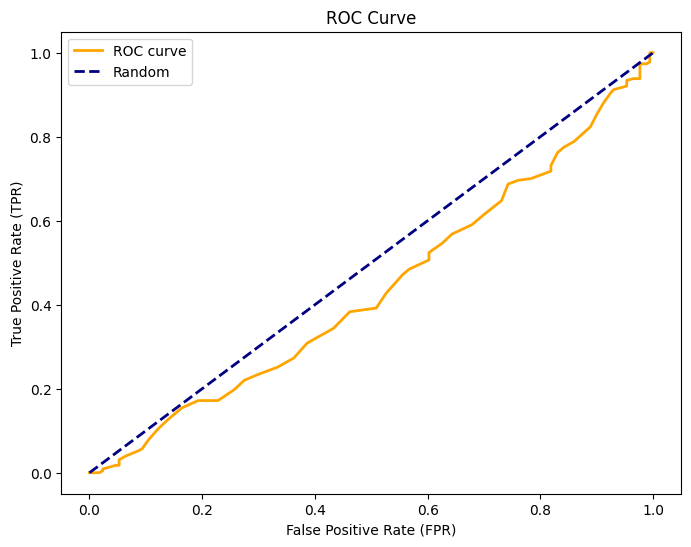

In [22]:
# Plot ROC Curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

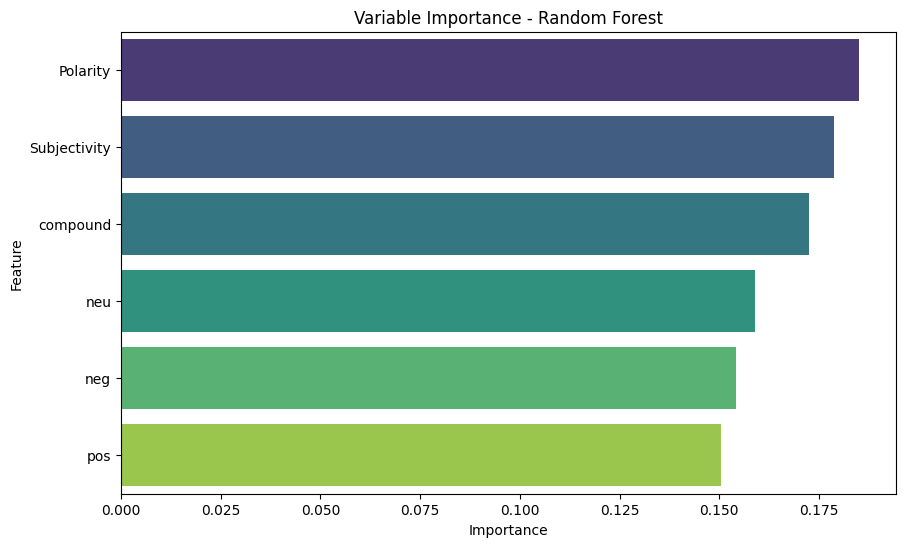

In [23]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Variable Importance - Random Forest')
plt.show()

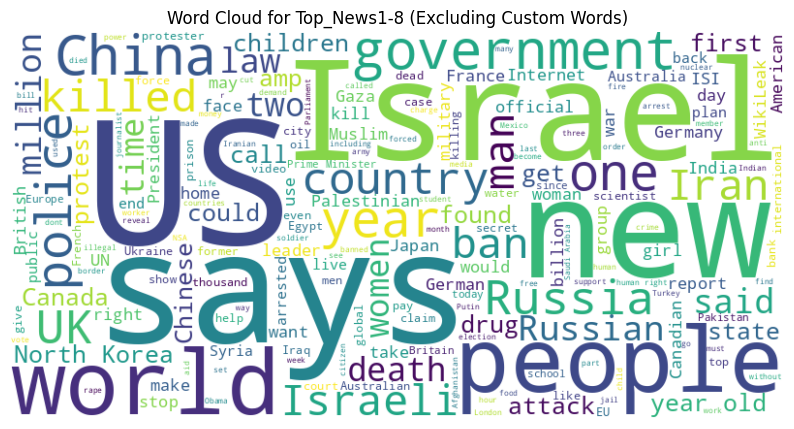

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Additional words you want to exclude
custom_exclude_words = ["say", "U", "etc"]

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(stopwords.words('english') + custom_exclude_words)

# Concatenate all the text from 'Top_News1-25' into a single string
text_combined = " ".join(merge['Top_News1-8'])

# Create a WordCloud object with custom stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text_combined)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top_News1-8 (Excluding Custom Words)')
plt.show()

#### Top 9-16

Accuracy: 0.53
Precision: 0.59
Recall: 0.54
F1 Score: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.51      0.48       171
           1       0.59      0.54      0.57       227

    accuracy                           0.53       398
   macro avg       0.52      0.53      0.52       398
weighted avg       0.53      0.53      0.53       398


Confusion Matrix:
[[ 87  84]
 [104 123]]
AUC-ROC: 0.53


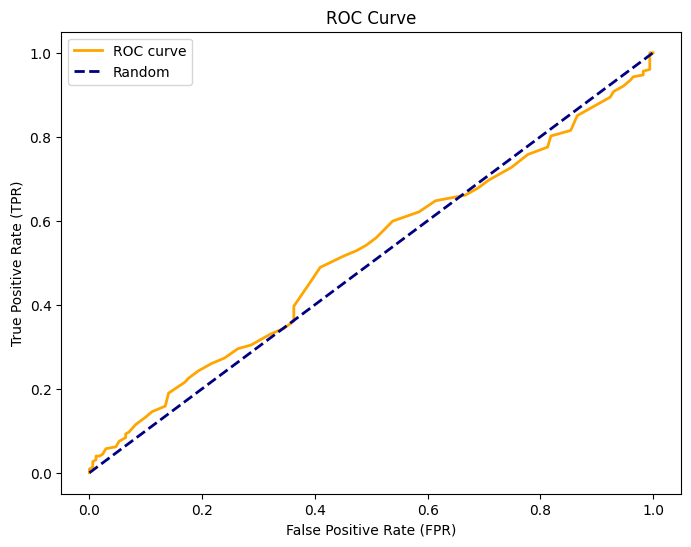

In [32]:
# Models training and evaluation
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,10:17]))

headline[0]

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i])

clean_headline[0]

merge['Top_News9-16'] = clean_headline
merge.head()

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

merge['Subjectivity'] = merge['Top_News9-16'].apply(get_subjectivity)
merge['Polarity'] = merge['Top_News9-16'].apply(get_polarity)

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Top_News9-16'])):
    SIA= getSIA(merge['Top_News9-16'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

# Creating New Dataframe for model building
top9_16= merge[['Date','Label','Adj Close','Subjectivity','Polarity','compound','neg','pos','neu','Top_News9-16']]

# Select features and target variable
features = ['Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu']
target = 'Label'

# Split the dataset into features (X) and target variable (y)
X = top9_16[features]
y = top9_16[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)
print(f'AUC-ROC: {roc_auc:.2f}')

# Plot ROC Curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

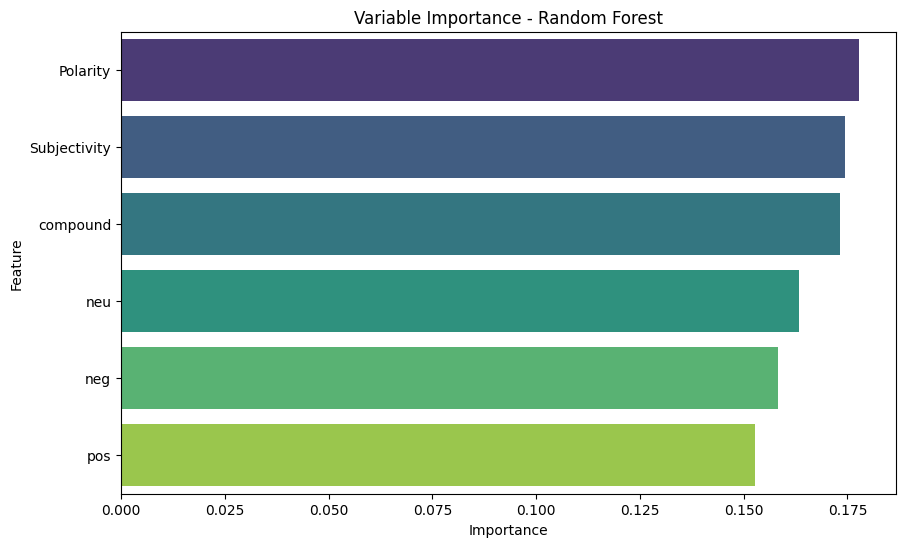

In [33]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Variable Importance - Random Forest')
plt.show()

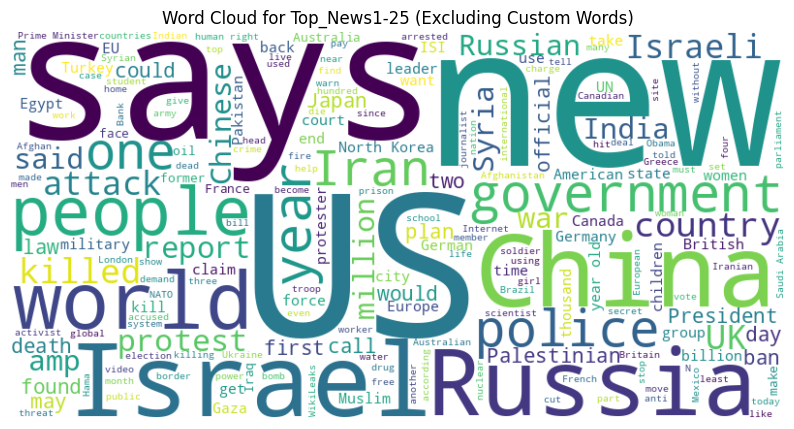

In [34]:
# Additional words you want to exclude
custom_exclude_words = ["say", "U", "etc"]

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(stopwords.words('english') + custom_exclude_words)

# Concatenate all the text from 'Top_News1-25' into a single string
text_combined = " ".join(merge['Top_News9-16'])

# Create a WordCloud object with custom stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text_combined)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top_News1-25 (Excluding Custom Words)')
plt.show()

#### Top17_25

Accuracy: 0.56
Precision: 0.62
Recall: 0.61
F1 Score: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       171
           1       0.62      0.61      0.61       227

    accuracy                           0.56       398
   macro avg       0.56      0.56      0.56       398
weighted avg       0.56      0.56      0.56       398


Confusion Matrix:
[[ 86  85]
 [ 89 138]]
AUC-ROC: 0.56


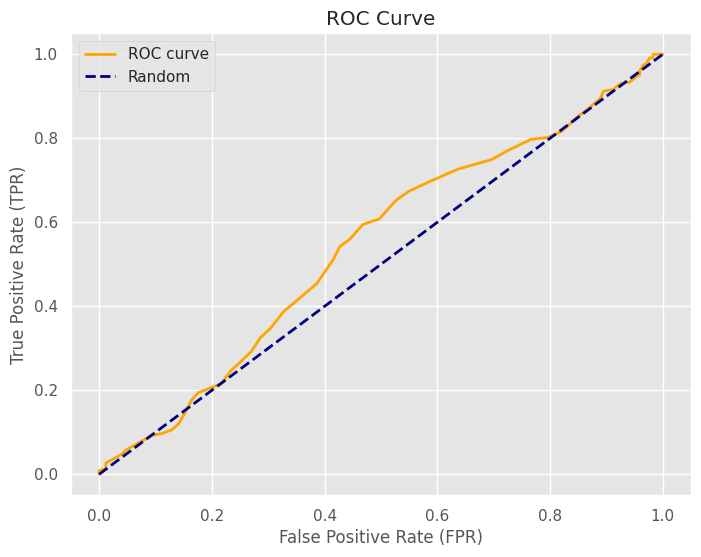

In [67]:
# Models training and evaluation
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,18:26]))

headline[0]

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i])

clean_headline[0]

merge['Top_News17-25'] = clean_headline
merge.head()

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

merge['Subjectivity'] = merge['Top_News17-25'].apply(get_subjectivity)
merge['Polarity'] = merge['Top_News17-25'].apply(get_polarity)

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Top_News17-25'])):
    SIA= getSIA(merge['Top_News17-25'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu


top17_25 = merge[['Date','Label','Adj Close','Subjectivity','Polarity','compound','neg','pos','neu','Top_News17-25']]
top17_25

# Select features and target variable
features = ['Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu']
target = 'Label'

# Split the dataset into features (X) and target variable (y)
X = top17_25[features]
y = top17_25[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)
print(f'AUC-ROC: {roc_auc:.2f}')

# Plot ROC Curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

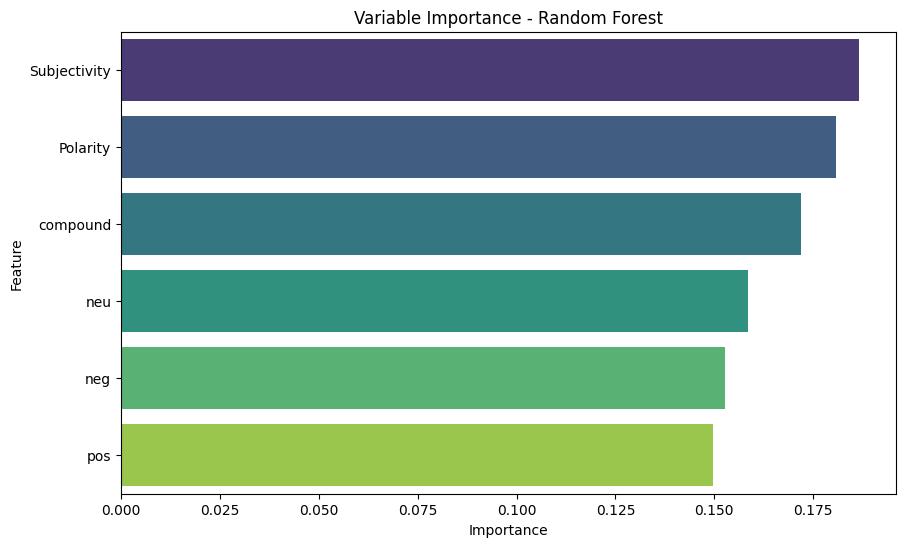

In [36]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Variable Importance - Random Forest')
plt.show()

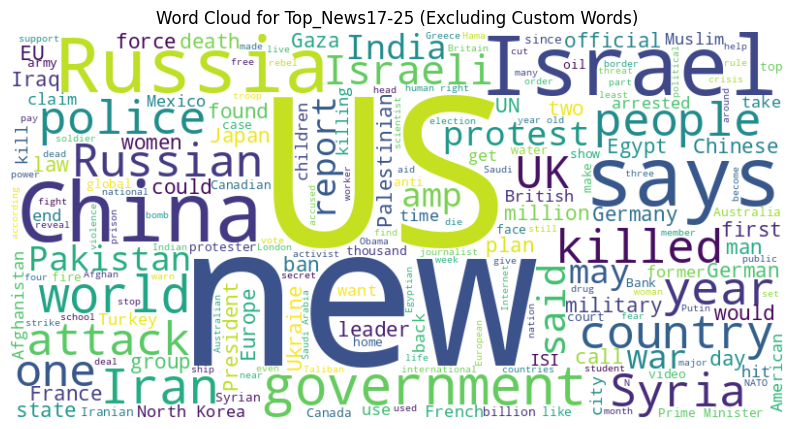

In [37]:
# Additional words you want to exclude
custom_exclude_words = ["say", "U", "etc"]

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(stopwords.words('english') + custom_exclude_words)

# Concatenate all the text from 'Top_News1-25' into a single string
text_combined = " ".join(merge['Top_News17-25'])

# Create a WordCloud object with custom stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text_combined)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top_News17-25 (Excluding Custom Words)')
plt.show()

#### Top1-25

Accuracy: 0.53
Precision: 0.58
Recall: 0.60
F1 Score: 0.59

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.43      0.44       171
           1       0.58      0.60      0.59       227

    accuracy                           0.53       398
   macro avg       0.52      0.52      0.52       398
weighted avg       0.53      0.53      0.53       398


Confusion Matrix:
[[ 74  97]
 [ 91 136]]
AUC-ROC: 0.52


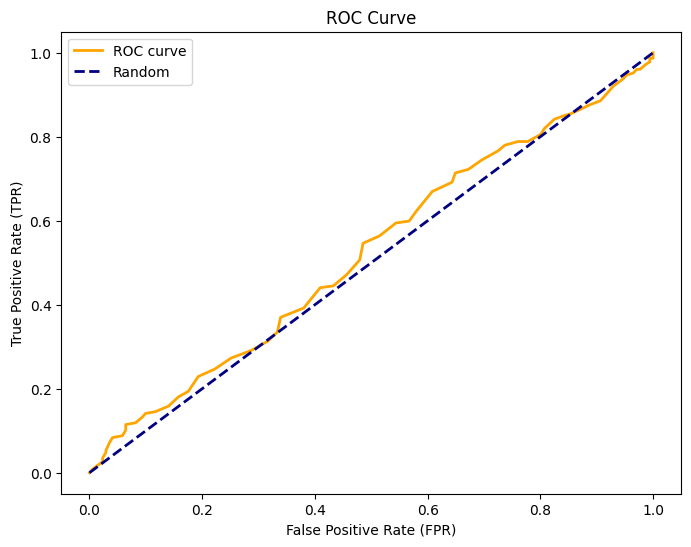

In [38]:
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:26]))

headline[0]

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i])

clean_headline[0]

merge['Top_News1-25'] = clean_headline
merge.head()

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

merge['Subjectivity'] = merge['Top_News1-25'].apply(get_subjectivity)
merge['Polarity'] = merge['Top_News1-25'].apply(get_polarity)

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Top_News1-25'])):
    SIA= getSIA(merge['Top_News1-25'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

merge.head(3)

top1_25= merge[['Date','Label','Adj Close','Subjectivity','Polarity','compound','neg','pos','neu','Top_News1-25']]
top1_25

# Select features and target variable
features = ['Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu']
target = 'Label'

# Split the dataset into features (X) and target variable (y)
X = top1_25[features]
y = top1_25[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)
print(f'AUC-ROC: {roc_auc:.2f}')

# Plot ROC Curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

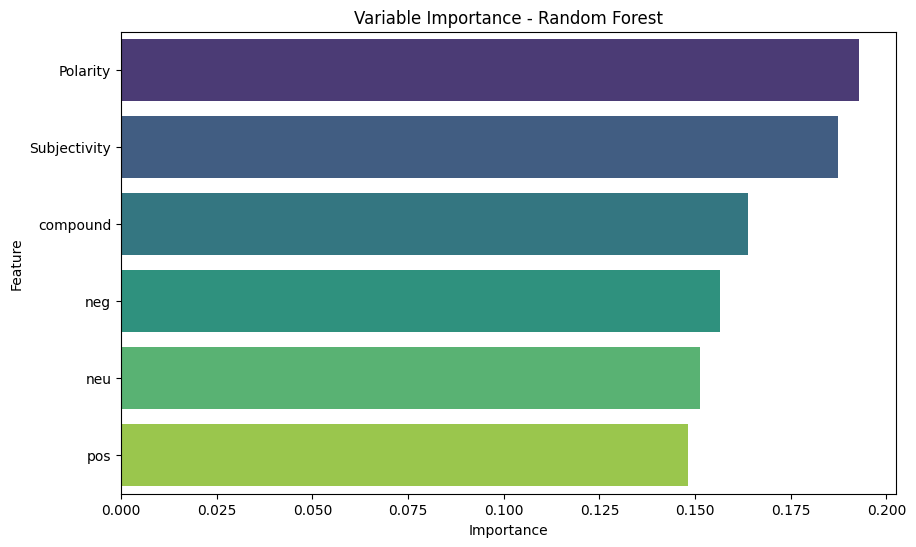

In [39]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Variable Importance - Random Forest')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Additional words you want to exclude
custom_exclude_words = ["say", "U", "etc"]

# Combine NLTK stopwords with custom stopwords
all_stopwords = set(stopwords.words('english') + custom_exclude_words)

# Concatenate all the text from 'Top_News1-25' into a single string
text_combined = " ".join(merge['Top_News1-25'])

# Create a WordCloud object with custom stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords).generate(text_combined)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top_News1-25 (Excluding Custom Words)')
plt.show()

## EDA based on sentiment analysis

In [48]:
df= merge[['Date','Label','Open','Close','Adj Close', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]

In [49]:
df["OC Increase"]=((df["Close"]-df["Open"])/df["Open"])*100
df["HL Average"]=((df["High"]+df["Low"])/2)
if(df['Adj Close'].equals(df['Close'])):
    df.drop(['Adj Close'], axis=1, inplace=True)
df["Total"]=((df["HL Average"]*df["Volume"]))

<ipython-input-49-958df84d34b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OC Increase"]=((df["Close"]-df["Open"])/df["Open"])*100
<ipython-input-49-958df84d34b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HL Average"]=((df["High"]+df["Low"])/2)
<ipython-input-49-958df84d34b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [50]:
df.describe()

,Label,Open,Close,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu,OC Increase,HL Average,Total
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03
mean,0.535445,13459.116048,13463.032255,13541.303173,13372.931728,1.628110e+08,0.361466,0.023105,-0.951640,0.161983,0.065728,0.772304,0.036604,13457.117450,1.986384e+12
std,0.498867,3143.281634,3144.006996,3136.271725,3150.420934,9.392343e+07,0.062086,0.054691,0.219038,0.039132,0.021273,0.042305,1.252473,3142.853401,7.898564e+11
min,0.000000,6547.009766,6547.049805,6709.609863,6469.950195,8.410000e+06,0.173165,-0.225978,-0.999500,0.060000,0.008000,0.600000,-7.783348,6612.560059,1.027956e+11
25%,0.000000,10907.339844,10913.379883,11000.980469,10824.759766,1.000000e+08,0.320401,-0.011222,-0.996200,0.134000,0.051000,0.745000,-0.439600,10914.635254,1.529435e+12
50%,1.000000,13022.049805,13025.580078,13088.110352,12953.129883,1.351700e+08,0.360967,0.025673,-0.992500,0.159000,0.064000,0.773000,0.064172,13021.209961,1.813743e+12
75%,1.000000,16477.699219,16478.410156,16550.070312,16392.769531,1.926000e+08,0.402267,0.059122,-0.984000,0.187000,0.079000,0.801000,0.569491,16472.785156,2.192193e+12
max,1.000000,18315.060547,18312.390625,18351.359375,18272.560547,6.749200e+08,0.638028,0.218242,0.991700,0.321000,0.152000,0.894000,10.932930,18311.345703,1.115241e+13


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1989 non-null   object 
 1   Label         1989 non-null   int64  
 2   Open          1989 non-null   float64
 3   Close         1989 non-null   float64
 4   High          1989 non-null   float64
 5   Low           1989 non-null   float64
 6   Volume        1989 non-null   int64  
 7   Subjectivity  1989 non-null   float64
 8   Polarity      1989 non-null   float64
 9   compound      1989 non-null   float64
 10  neg           1989 non-null   float64
 11  pos           1989 non-null   float64
 12  neu           1989 non-null   float64
 13  OC Increase   1989 non-null   float64
 14  HL Average    1989 non-null   float64
 15  Total         1989 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 328.7+ KB


<ipython-input-52-ea57dbf411ed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True))


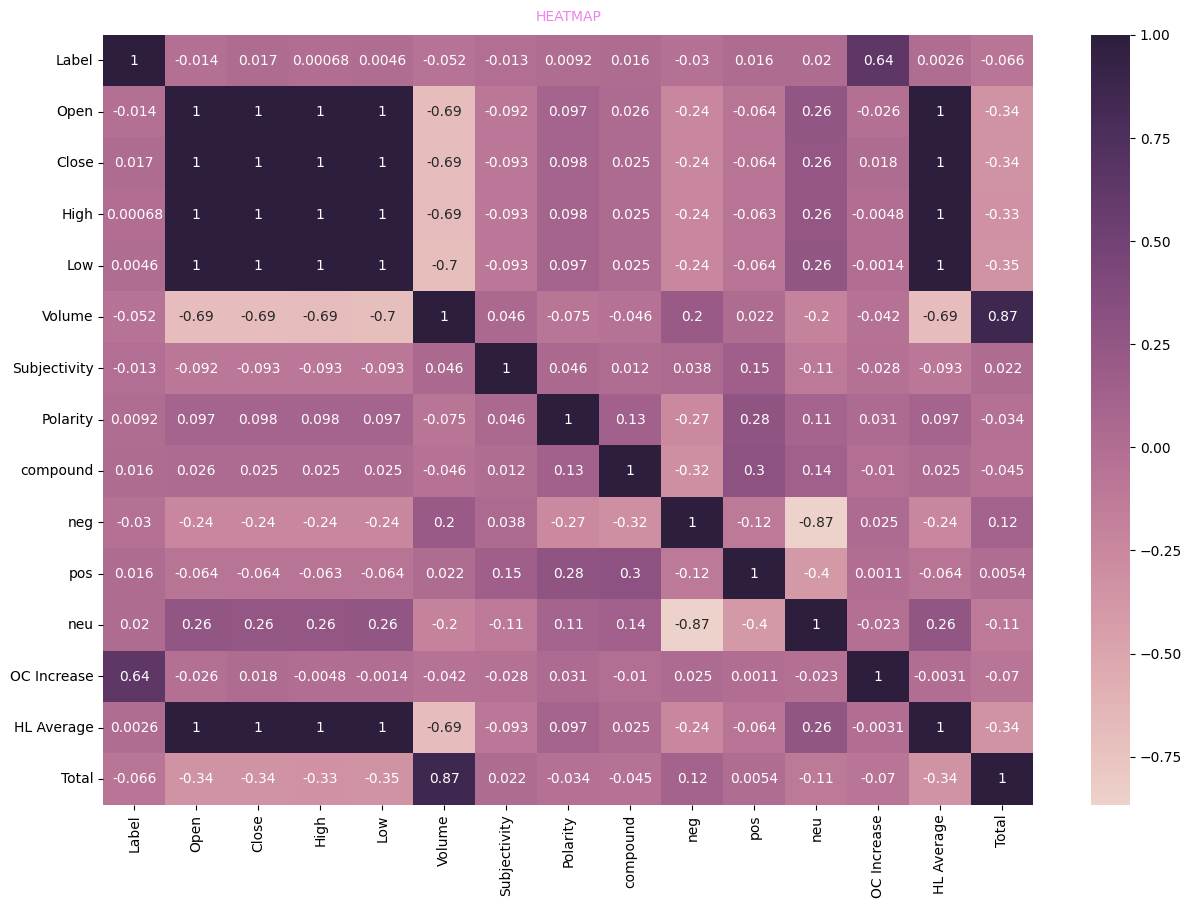

In [52]:
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("HEATMAP", fontsize = 10, color = 'violet', pad = 10, loc = 'center')
plt.show()

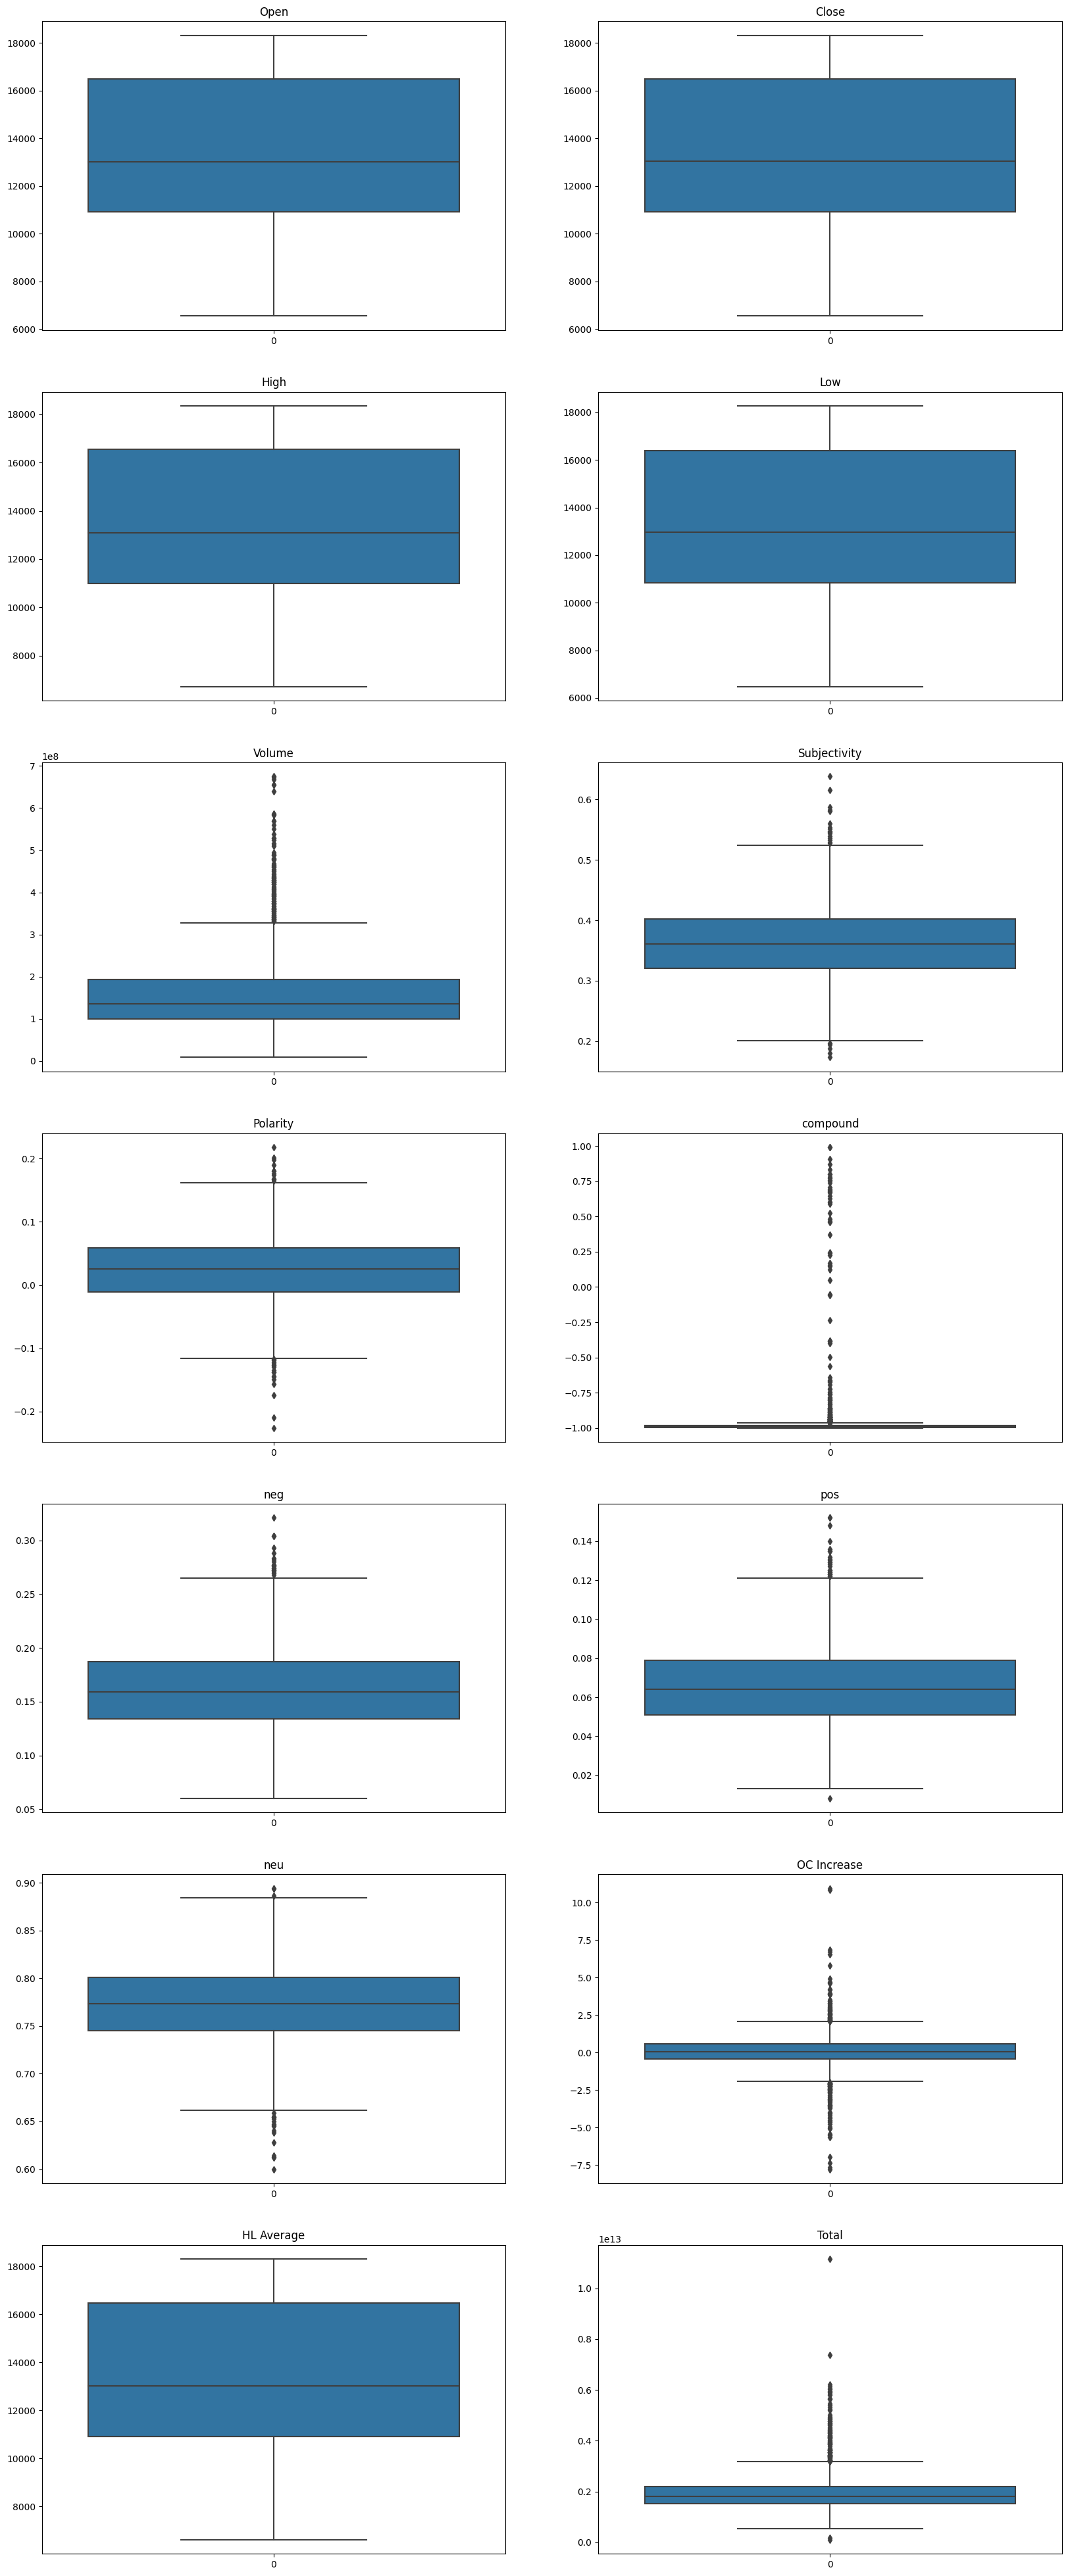

In [53]:
#df1= merge[['Date','Label',,,, , ,'Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
templ=['Open','Close','High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu','OC Increase','HL Average','Total']
k=0
fig, axes = plt.subplots(7,2, figsize=(20, 50))
for i in range(7):
    for j in range(2):
        sns.boxplot(data=df[templ[k]],ax=axes[i, j],)
        axes[i,j].set_title(templ[k])
        k+=1

<Axes: >

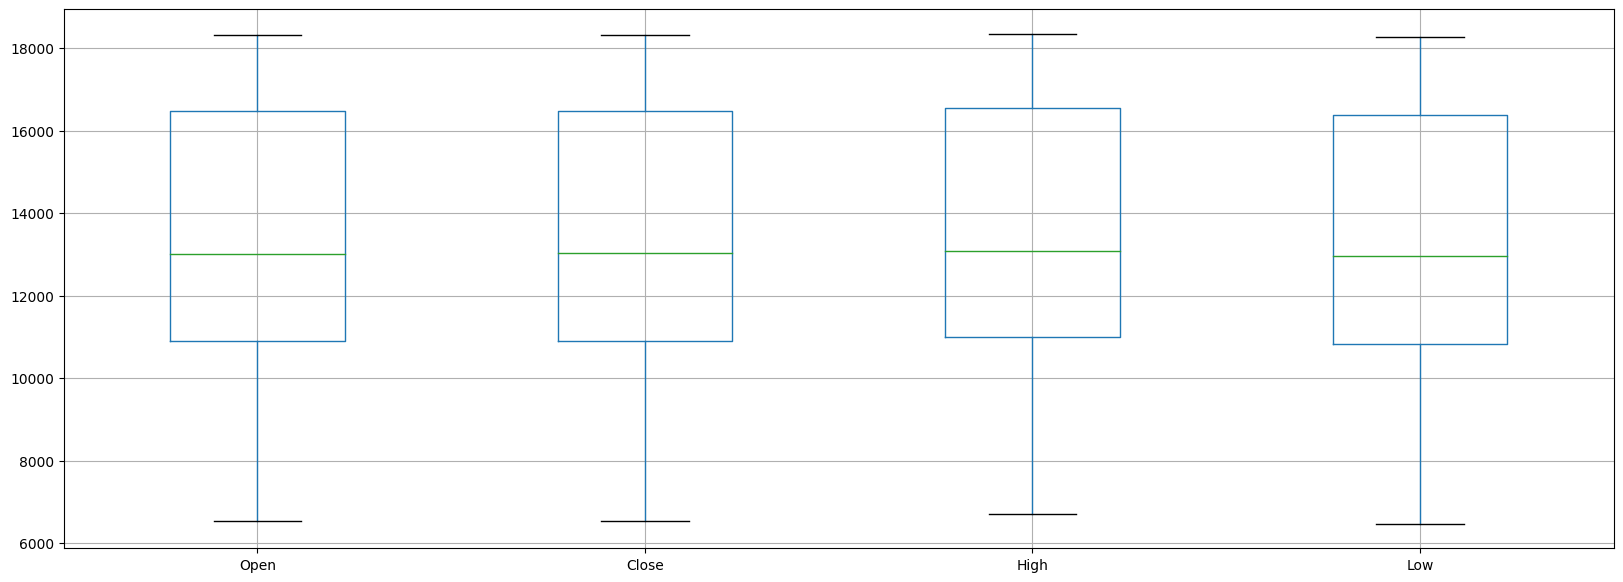

In [54]:
df[['Open','Close','High', 'Low']].boxplot(figsize=(20,7))

<Axes: >

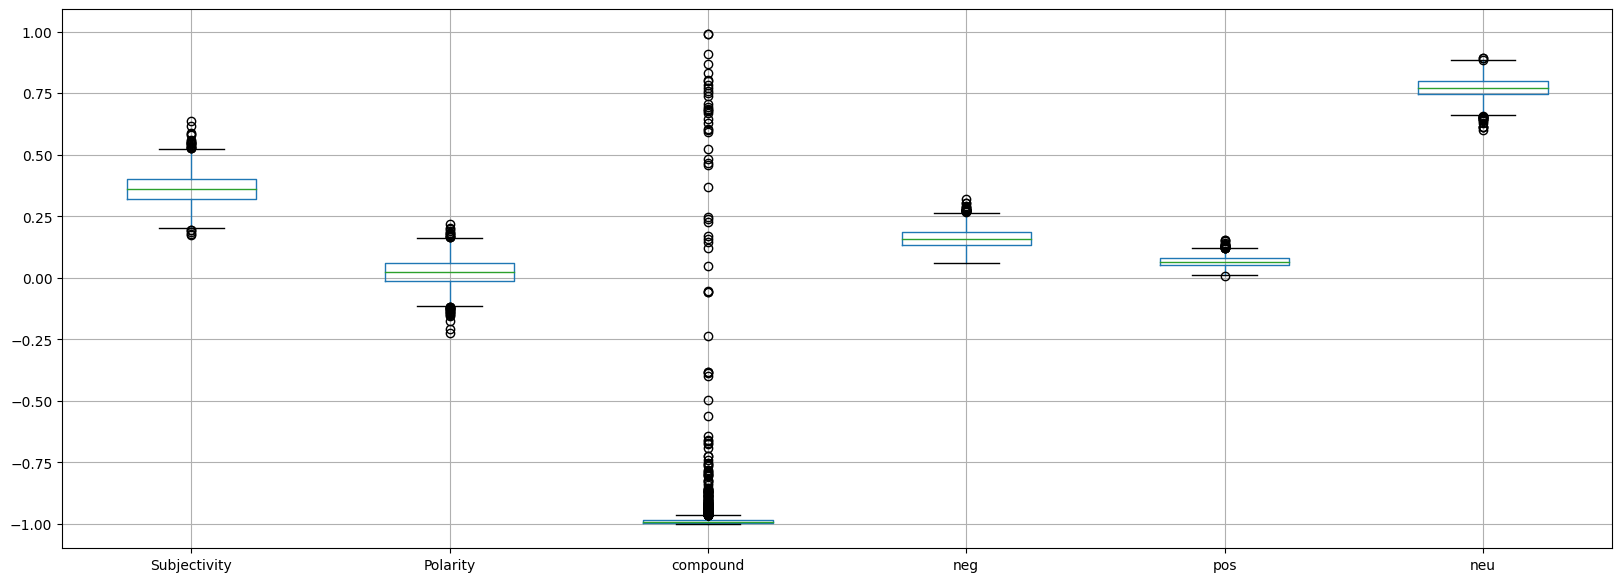

In [55]:
df[['Subjectivity','Polarity','compound','neg','pos','neu']].boxplot(figsize=(20,7))

<Axes: >

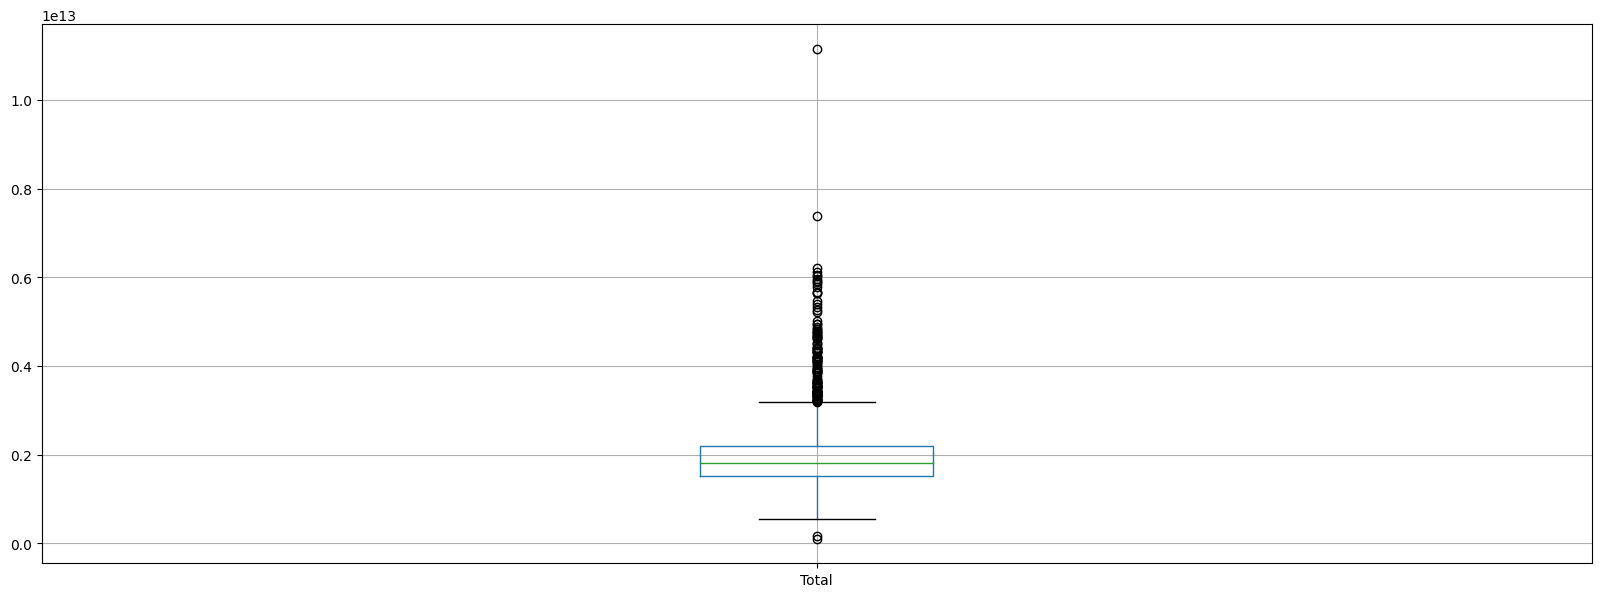

In [56]:
df[['Total']].boxplot(figsize=(20,7))

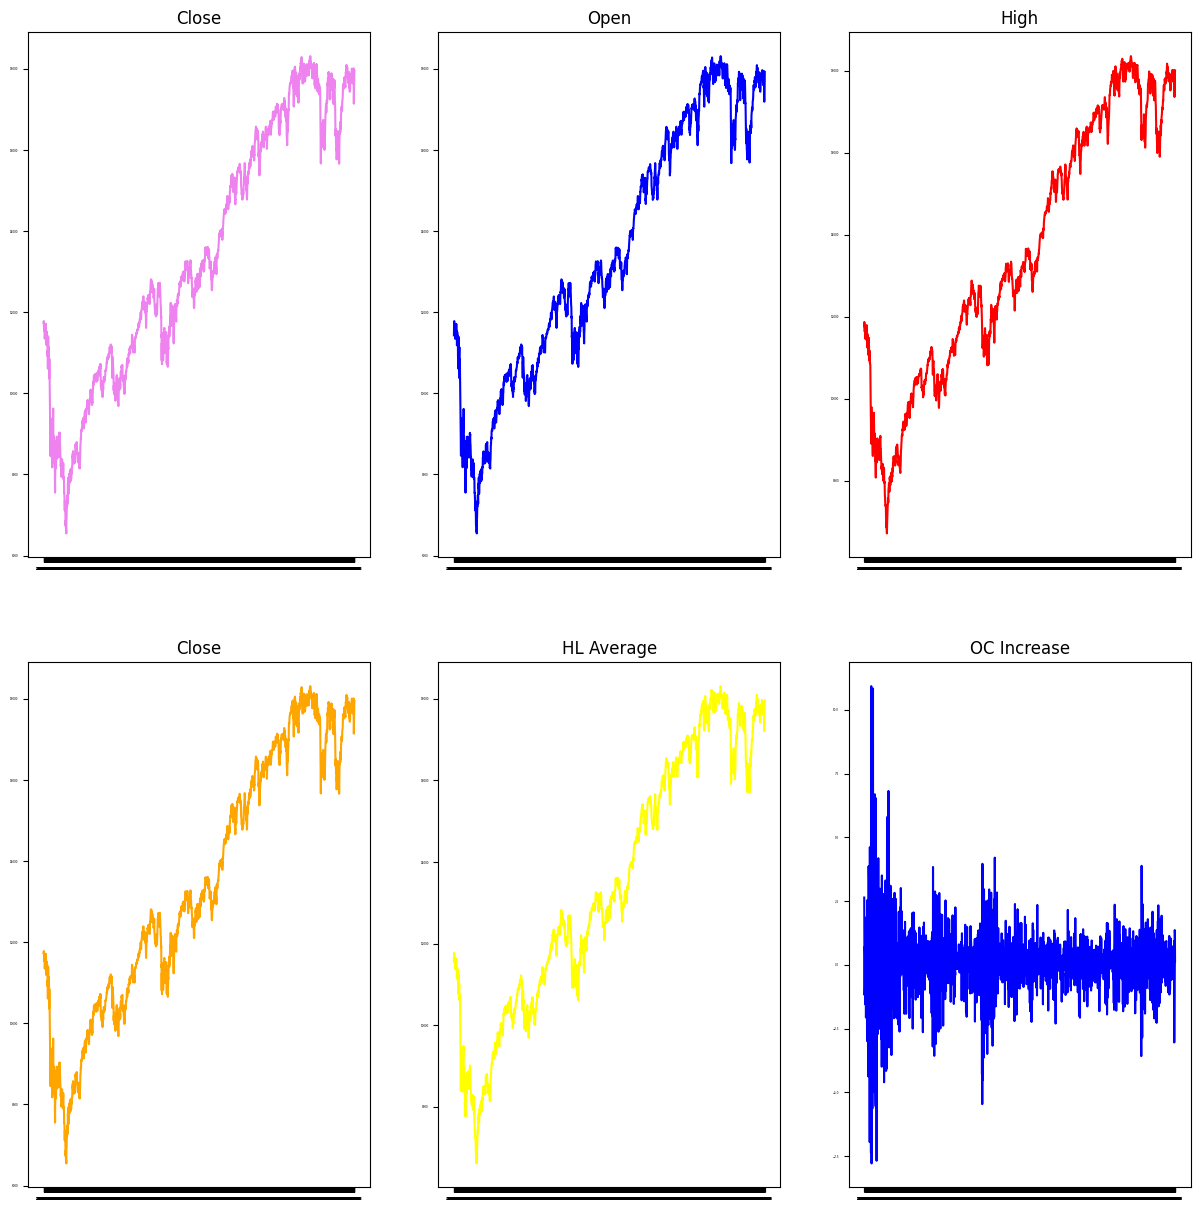

In [57]:
figure,axis= plt.subplots(2,3,figsize=(15,15))


axis[0,0].plot(df["Date"],df["Close"], color='violet')
axis[0,0].set_title("Close")
axis[0,0].tick_params(axis='x', labelsize=2)
axis[0,0].tick_params(axis='y', labelsize=2)


axis[0,1].plot(df["Date"],df["Open"], color='blue')
axis[0,1].set_title("Open")
axis[0,1].tick_params(axis='x', labelsize=2)
axis[0,1].tick_params(axis='y', labelsize=2)

axis[0,2].plot(df["Date"],df["High"], color='red')
axis[0,2].set_title("High")
axis[0,2].tick_params(axis='x', labelsize=2)
axis[0,2].tick_params(axis='y', labelsize=2)

axis[1,0].plot(df["Date"],df["Close"], color='orange')
axis[1,0].set_title("Close")
axis[1,0].tick_params(axis='x', labelsize=2)
axis[1,0].tick_params(axis='y', labelsize=2)

axis[1,1].plot(df["Date"],df["HL Average"], color='yellow')
axis[1,1].set_title("HL Average")
axis[1,1].tick_params(axis='x', labelsize=2)
axis[1,1].tick_params(axis='y', labelsize=2)

axis[1,2].plot(df["Date"],df["OC Increase"], color='blue')
axis[1,2].set_title("OC Increase")
axis[1,2].tick_params(axis='x', labelsize=2)
axis[1,2].tick_params(axis='y', labelsize=2)

plt.show()

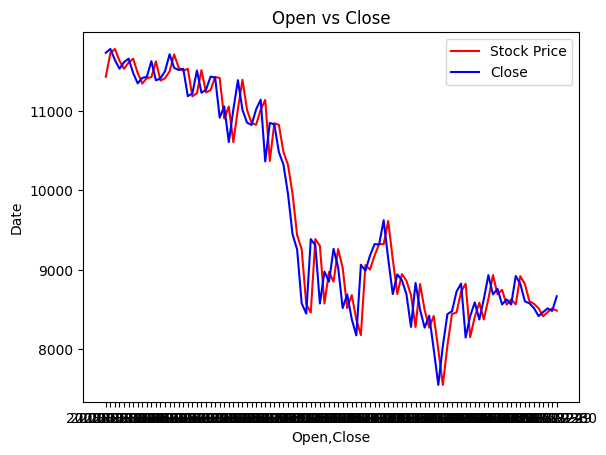

In [58]:
df6=df.iloc[:100,:]

plt.plot(df6["Date"],df6["Open"],color="red",label="Stock Price")
plt.plot(df6["Date"],df6["Close"] ,color="blue", label="Close")
plt.xlabel("Open,Close")
plt.ylabel("Date")

plt.legend()
plt.title("Open vs Close")
plt.show()

In [59]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Volume', ylabel='Total'>

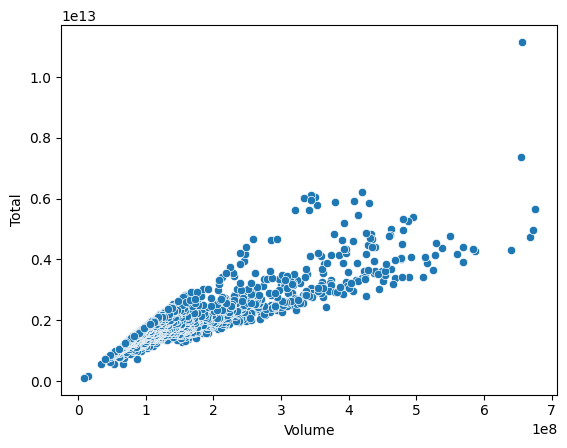

In [60]:
sns.scatterplot(data=df,x='Volume',y='Total')

<Axes: xlabel='High', ylabel='Close'>

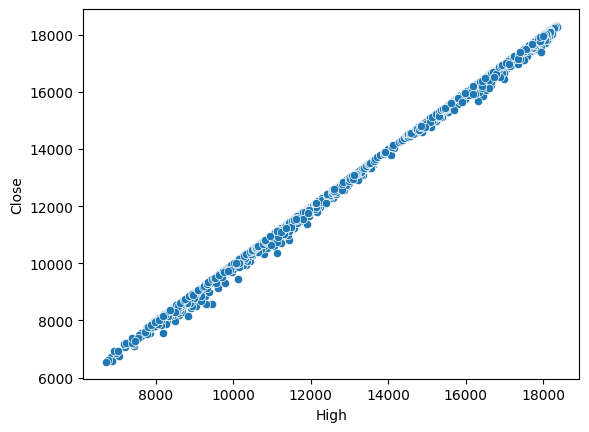

In [61]:
sns.scatterplot(data=df,x='High',y='Close')

<ipython-input-62-b4d13792853b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'], color='violet')
<ipython-input-62-b4d13792853b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'], color='purple')
<ipython-input-62-b4d13792853b>:8: UserWarning: 

`distplot` is a deprecated 

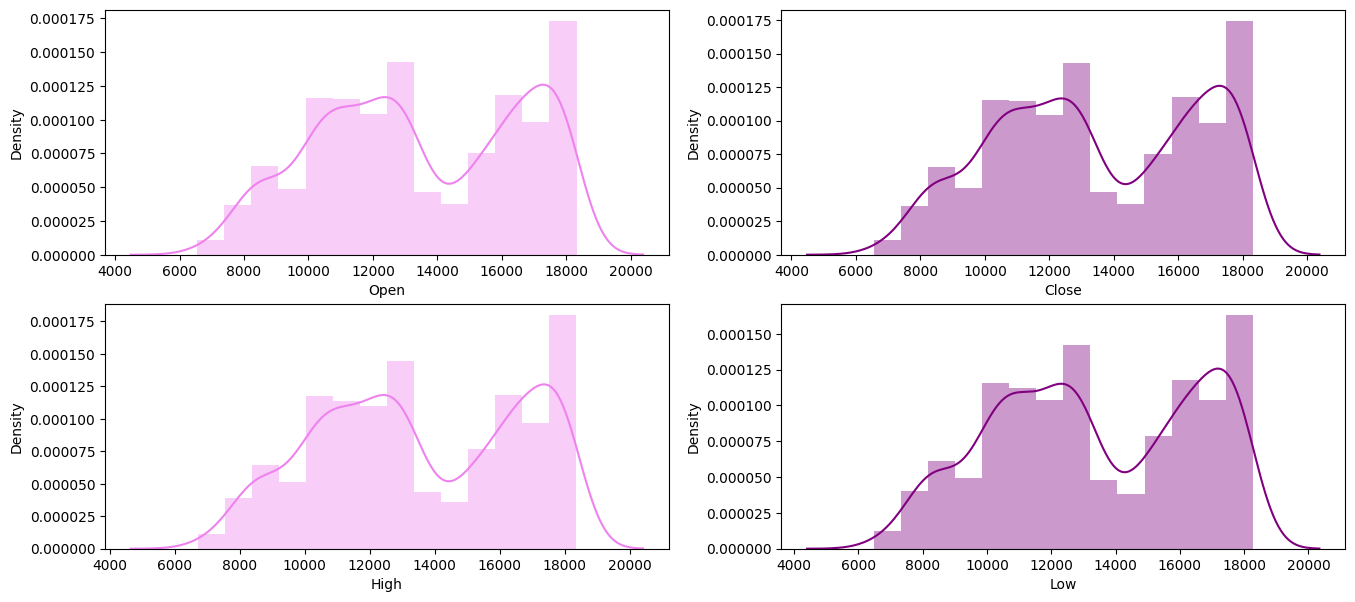

In [62]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
sns.distplot(df['Open'], color='violet')
plt.subplot(2,2,2)
sns.distplot(df['Close'], color='purple')

plt.subplot(2,2,3)
sns.distplot(df['High'], color='violet')
plt.subplot(2,2,4)
sns.distplot(df['Low'], color='purple')
plt.show()

<ipython-input-63-05bed0f43b30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


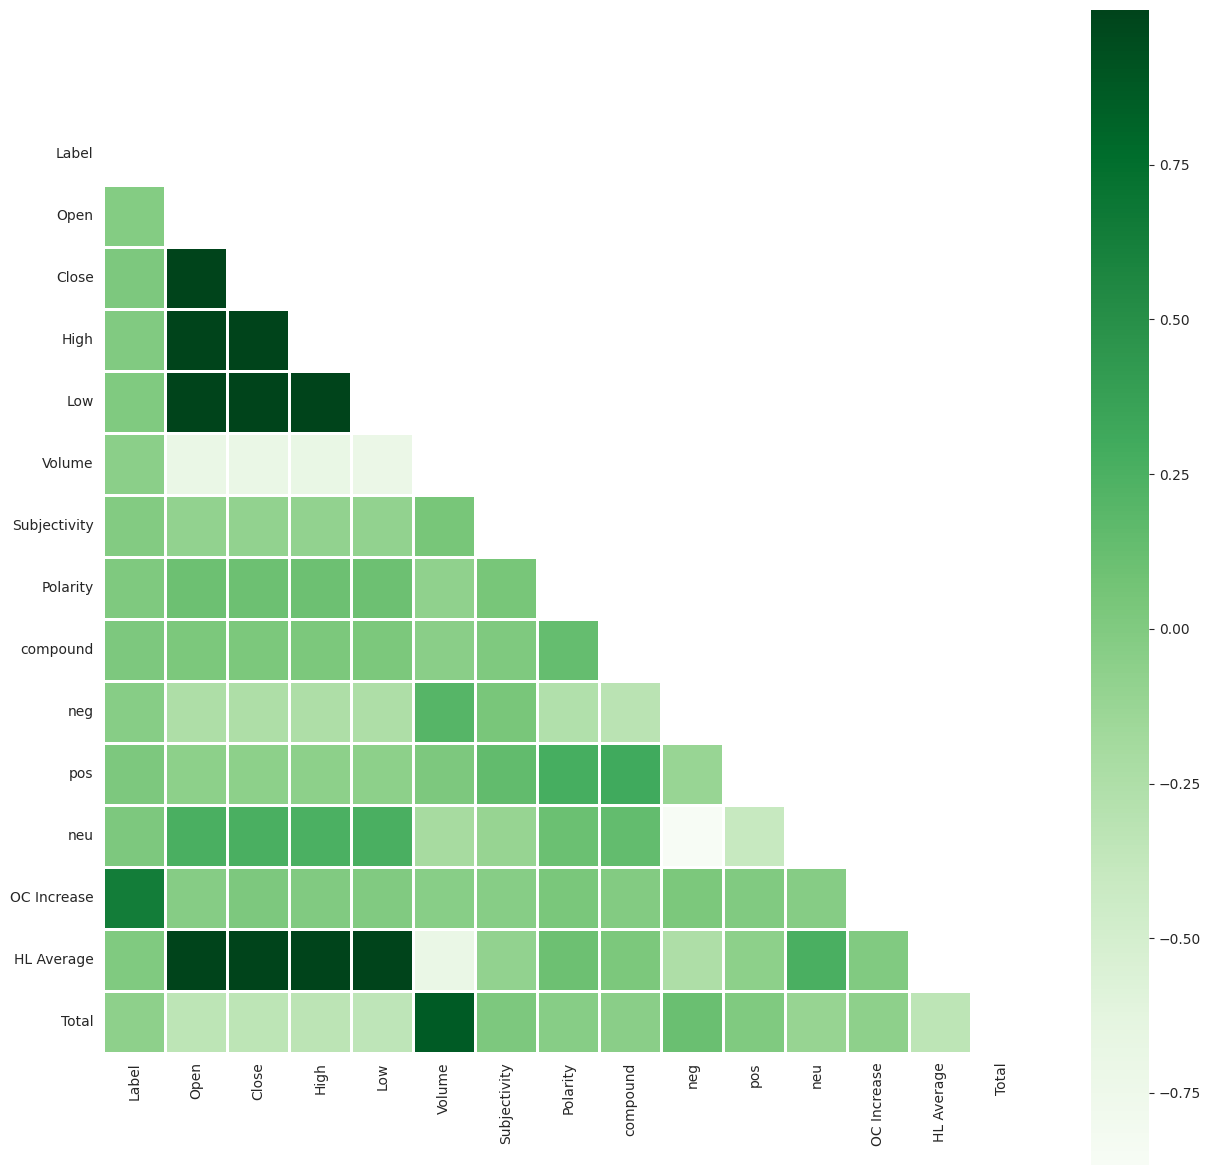

In [63]:
correlations = df.corr()
hm = np.zeros_like(correlations)
hm[np.triu_indices_from(hm)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations,mask=hm,square=True,linewidths=.8,cmap="Greens")

<ipython-input-64-86e638e60650>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 52, kde = False, color = 'r')


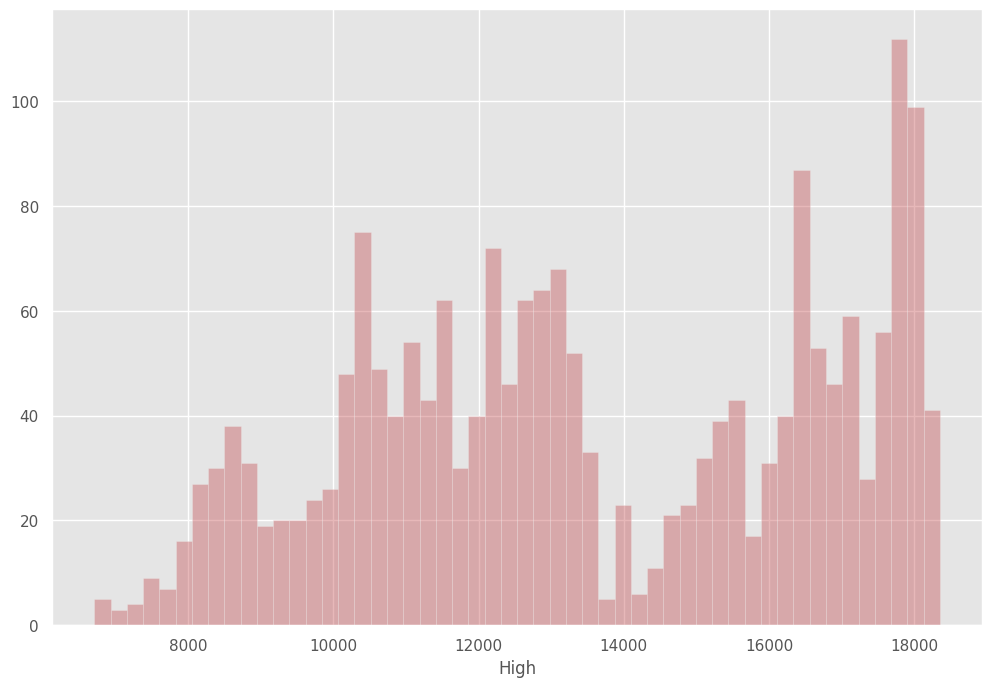

In [64]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.High
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')

<ipython-input-65-a238331cfe5b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 52, kde = False, color = 'm')


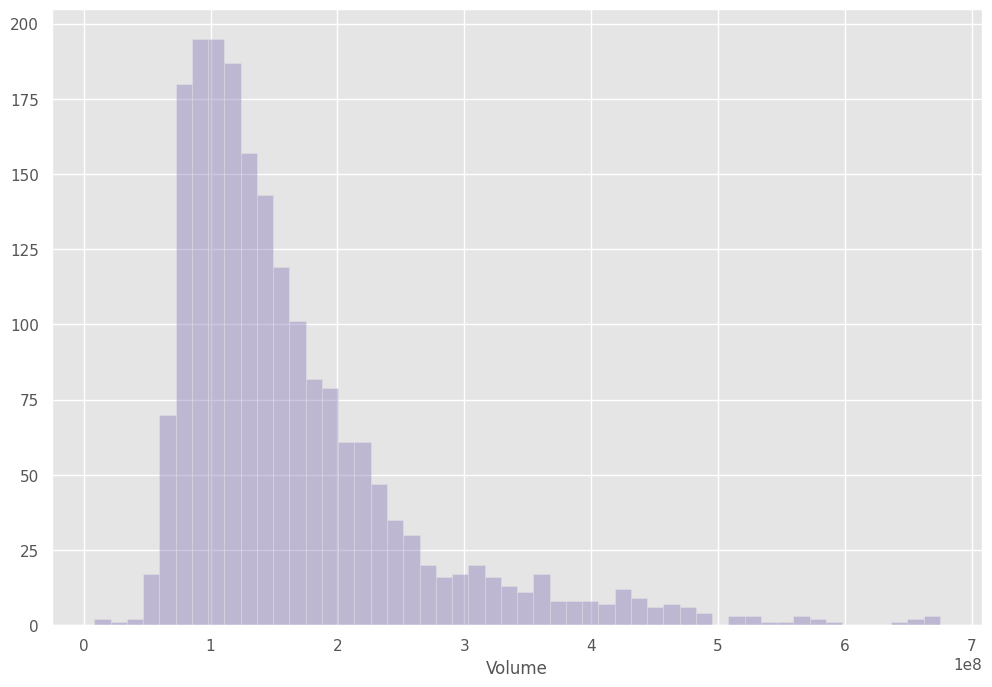

In [65]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Volume
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'm')

<ipython-input-66-f47981cfc4b0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 52, kde = False, color = 'y')


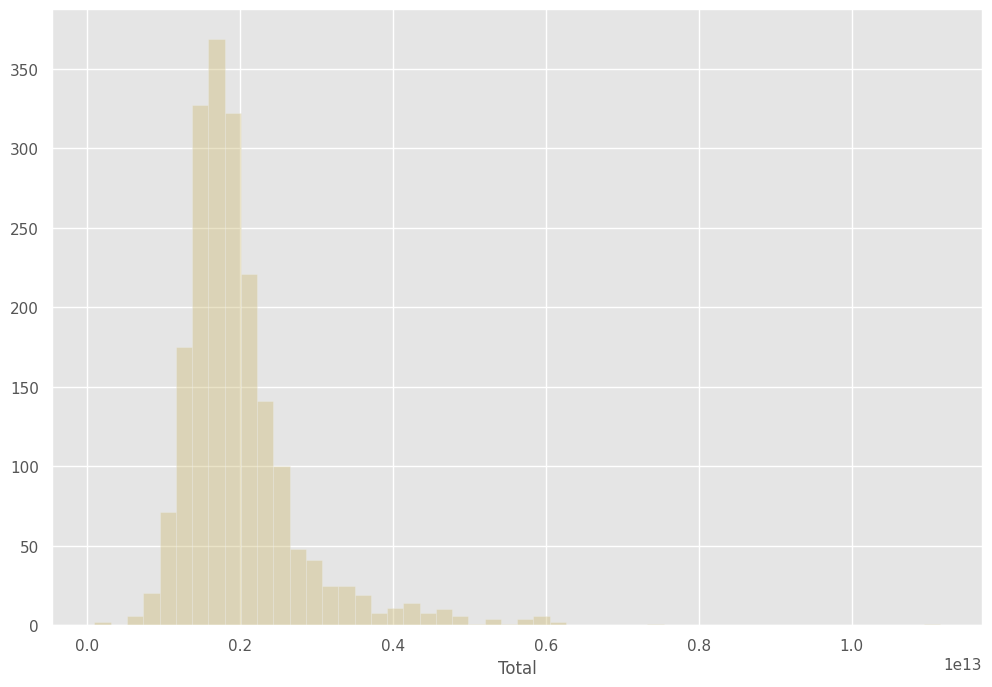

In [66]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Total
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 52, kde = False, color = 'y')

## Time Series Analysis

In [ ]:
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
DJIA

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


### ACF & PACF plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x400 with 0 Axes>

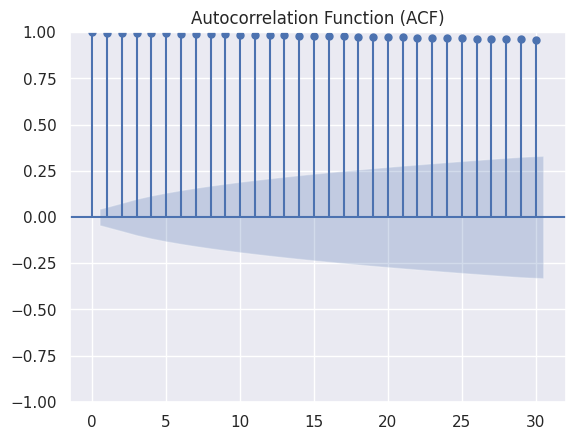

<Figure size 1200x400 with 0 Axes>

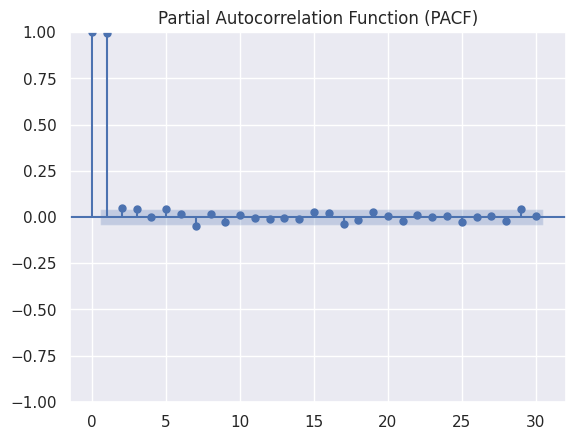

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(DJIA['Adj Close'], lags=30, title='Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(DJIA['Adj Close'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.show()

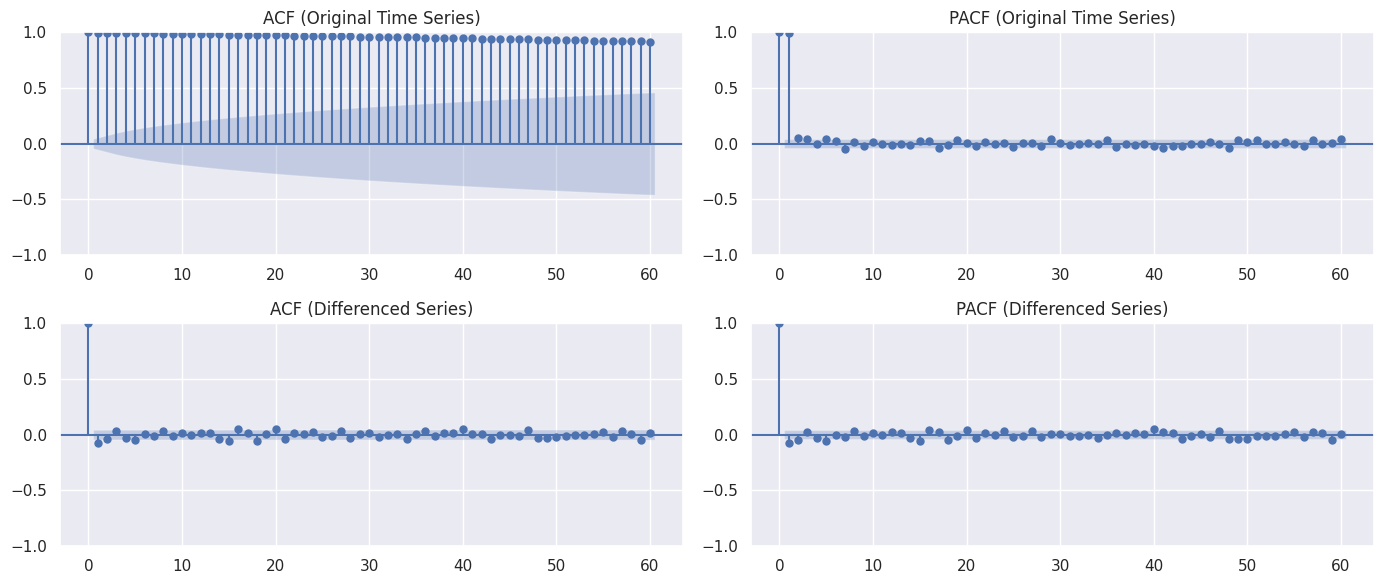

In [ ]:
# ACF and PACF plots for non-seasonal components
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(2, 2, 1)
plot_acf(DJIA['Adj Close'], lags=60, ax=plt.gca(), title='ACF (Original Time Series)')

# PACF plot
plt.subplot(2, 2, 2)
plot_pacf(DJIA['Adj Close'], lags=60, ax=plt.gca(), title='PACF (Original Time Series)')

# ACF and PACF plots for differenced series (non-seasonal)
plt.subplot(2, 2, 3)
plot_acf(DJIA['Adj Close'].diff().dropna(), lags=60, ax=plt.gca(), title='ACF (Differenced Series)')
plt.subplot(2, 2, 4)
plot_pacf(DJIA['Adj Close'].diff().dropna(), lags=60, ax=plt.gca(), title='PACF (Differenced Series)')

plt.tight_layout()
plt.show()

### Train Test Split

In [ ]:
# Setting Train Test Split time point
train_start =  datetime(2008,8,8)
train_end =  datetime(2014,11,30)
test_end = datetime(2016,7,1)
valid_start = datetime(2013,9,8)

In [ ]:
train=DJIA[train_start:valid_start]
test=DJIA[train_end:test_end]
valid=DJIA[valid_start:train_end]
print(train.shape)
print(test.shape)
print(valid.shape)

(1279, 6)
(400, 6)
(310, 6)


### SARIMA

In [ ]:
Sarima = pm.auto_arima(train['Adj Close'], start_p=1, start_q=1,
                      max_p=6, max_q=6,
                      d=1,  max_d = 6,
                      start_P = 1, start_Q = 1,
                      max_P = 6, max_Q = 6,
                      D = 1, max_D = 6,
                      m = 4,
                      seasonal = True,
                      trace = True,
                      error_action='ignore',
                      suppress_warnings = True,
                      stepwise = True)

Sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=17178.492, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=16755.071, Time=0.87 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=2.43 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=17168.880, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=16603.606, Time=1.62 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=16493.974, Time=2.12 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=16440.409, Time=3.06 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=16419.702, Time=8.09 sec
 ARIMA(1,1,0)(6,1,0)[4]             : AIC=16403.645, Time=6.90 sec
 ARIMA(1,1,0)(6,1,1)[4]             : AIC=inf, Time=19.82 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=12.90 sec
 ARIMA(0,1,0)(6,1,0)[4]             : AIC=16414.627, Time=1.00 sec
 ARIMA(2,1,0)(6,1,0)[4]             : AIC=16402.052, Time=6.01 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1279
Model:             SARIMAX(3, 1, 0)x(6, 1, 0, 4)   Log Likelihood               -8190.708
Date:                           Wed, 13 Dec 2023   AIC                          16401.416
Time:                                   00:16:46   BIC                          16452.915
Sample:                                        0   HQIC                         16420.758
                                          - 1279                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1030      0.020     -5.117      0.000      -0.142      -0.064
ar.L2         -0.0499      0.017     -2.858      0.004      -0.084      -0.016
ar.L3          0.0458      0.018      2.522      0.012       0.010       0.081
ar.S.L4       -0.9025      0.018    -49.330      0.000      -0.938      -0.867
ar.S.L8       -0.7430      0.026    -28.260      0.000      -0.795      -0.691
ar.S.L12      -0.5972      0.029    -20.861      0.000      -0.653      -0.541
ar.S.L16      -0.4087      0.027    -15.152      0.000      -0.462      -0.356
ar.S.L20      -0.2476      0.027     -9.217      0.000      -0.300      -0.195
ar.S.L24      -0.1229      0.020     -6.235      0.000      -0.161      -0.084
sigma2      2.233e+04    534.912     41.743      0.000    2.13e+04    2.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1065.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
Sarima = SARIMAX(train['Adj Close'], order = (3, 1, 0), seasonal_order = (6, 1, 0, 36))
SarimaResult = Sarima.fit()
SarimaResult.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1279
Model:             SARIMAX(3, 1, 0)x(6, 1, 0, 36)   Log Likelihood               -8017.470
Date:                            Wed, 13 Dec 2023   AIC                          16054.940
Time:                                    00:26:48   BIC                          16106.185
Sample:                                         0   HQIC                         16074.211
                                           - 1279                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1043      0.020     -5.196      0.000      -0.144      -0.065
ar.L2         -0.0430      0.018     -2.409      0.016      -0.078      -0.008
ar.L3          0.0595      0.020      3.011      0.003       0.021       0.098
ar.S.L36      -0.8484      0.025    -34.200      0.000      -0.897      -0.800
ar.S.L72      -0.7224      0.036    -19.993      0.000      -0.793      -0.652
ar.S.L108     -0.5419      0.043    -12.696      0.000      -0.626      -0.458
ar.S.L144     -0.4008      0.044     -9.124      0.000      -0.487      -0.315
ar.S.L180     -0.2602      0.043     -6.093      0.000      -0.344      -0.177
ar.S.L216     -0.0954      0.036     -2.665      0.008      -0.166      -0.025
sigma2      2.275e+04    669.479     33.978      0.000    2.14e+04    2.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               460.74
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_valid = SarimaResult.get_forecast(len(valid.index))
y_valid_df = y_valid.conf_int(alpha = 0.05)
y_valid_df["Predictions"] = SarimaResult.predict(start = y_valid_df.index[0], end = y_valid_df.index[-1])
y_valid_df.index = valid.index
y_valid_out = y_valid_df["Predictions"]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
Sarima_MAPE = mean_absolute_percentage_error(valid['Adj Close'], y_valid_df.Predictions)
Sarima_RMSE = mean_squared_error(valid['Adj Close'], y_valid_df.Predictions, squared = False)
r_squared = r2_score(valid['Adj Close'], y_valid_out)
n = len(valid['Adj Close'])
k = 1
Sarima_adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print('Sarima_MAPE: ', Sarima_MAPE)
print('Sarima_RMSE: ', Sarima_RMSE)
print('r_squared: ', r_squared)
print('Sarima_adjusted_r_squared: ', Sarima_adjusted_r_squared)

Sarima_MAPE:  0.02893060491108235
Sarima_RMSE:  537.9033079518882
r_squared:  0.29610381440172395
Sarima_adjusted_r_squared:  0.2938184371757555


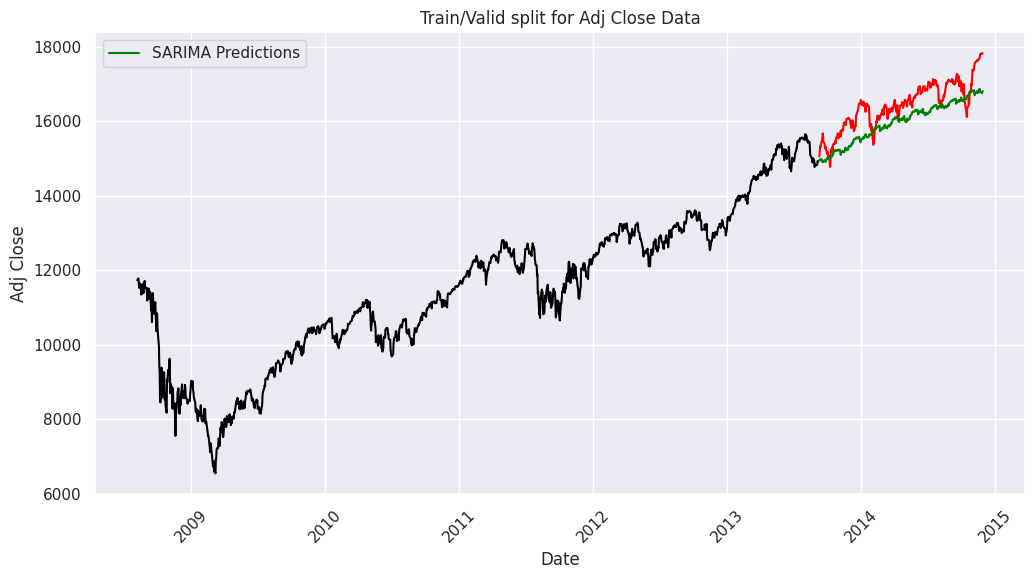

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "red")
plt.plot(y_valid_out, color='green', label = 'SARIMA Predictions')
plt.legend()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Valid split for Adj Close Data")
plt.show()

### SARIMAX

#### Data Merging

In [ ]:
news = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/Combined_News_DJIA.csv',encoding='utf-8')
DJIA = pd.read_csv('https://raw.githubusercontent.com/OliverHu726/ML_in_FRE/main/Project/data/upload_DJIA_table.csv')
merge=news.merge(DJIA,how="inner",on="Date")

In [ ]:
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:26]))

headline[0]

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i]))
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i])
    clean_headline[i]=re.sub("\'",'',clean_headline[i])

clean_headline[0]

merge['Top_News1-25'] = clean_headline
merge.head()

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

merge['Subjectivity'] = merge['Top_News1-25'].apply(get_subjectivity)
merge['Polarity'] = merge['Top_News1-25'].apply(get_polarity)

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Top_News1-25'])):
    SIA= getSIA(merge['Top_News1-25'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu
df = merge[['Date','Label','Adj Close', 'Open','Subjectivity','Polarity','compound','neg','pos','neu','Top_News1-25']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<ipython-input-9-a28349389ac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
train=df[train_start:valid_start]
test=df[train_end:test_end]
valid=df[valid_start:train_end]
print(train.shape)
print(test.shape)
print(valid.shape)

(1279, 10)
(400, 10)
(310, 10)


#### Model Building

In [ ]:
Sarima = SARIMAX(train['Adj Close'], exog = train[['Subjectivity', 'Polarity', 'compound']],
                 order = (3, 1, 0), seasonal_order = (6, 1, 0, 30))
SarimaResult = Sarima.fit()
SarimaResult.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1279
Model:             SARIMAX(3, 1, 0)x(6, 1, 0, 36)   Log Likelihood               -8014.758
Date:                            Wed, 13 Dec 2023   AIC                          16055.515
Time:                                    02:14:04   BIC                          16122.133
Sample:                                         0   HQIC                         16080.567
                                           - 1279                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Subjectivity   -98.1631     50.582     -1.941      0.052    -197.301       0.975
Polarity       -55.4517     53.542     -1.036      0.300    -160.392      49.488
compound         8.6049     14.836      0.580      0.562     -20.473      37.683
ar.L1           -0.1004      0.021     -4.705      0.000      -0.142      -0.059
ar.L2           -0.0458      0.018     -2.529      0.011      -0.081      -0.010
ar.L3            0.0598      0.020      3.031      0.002       0.021       0.098
ar.S.L36        -0.8487      0.025    -34.003      0.000      -0.898      -0.800
ar.S.L72        -0.7216      0.036    -19.836      0.000      -0.793      -0.650
ar.S.L108       -0.5425      0.043    -12.643      0.000      -0.627      -0.458
ar.S.L144       -0.4031      0.044     -9.182      0.000      -0.489      -0.317
ar.S.L180       -0.2635      0.043     -6.163      0.000      -0.347      -0.180
ar.S.L216       -0.1013      0.035     -2.857      0.004      -0.171      -0.032
sigma2        2.264e+04    669.121     33.838      0.000    2.13e+04     2.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               484.40
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_valid = SarimaResult.get_forecast(
    len(valid.index),
    exog = valid[['Subjectivity', 'Polarity', 'compound']])
y_valid_df = y_valid.conf_int(alpha = 0.05)
y_valid_df["Predictions"] = SarimaResult.predict(
    start = y_valid_df.index[0], end = y_valid_df.index[-1],
    exog = valid[['Subjectivity', 'Polarity', 'compound']])
y_valid_df.index = valid.index
y_valid_out = y_valid_df["Predictions"]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
Sarima_MAPE = mean_absolute_percentage_error(valid['Adj Close'], y_valid_df.Predictions)
Sarima_RMSE = mean_squared_error(valid['Adj Close'], y_valid_df.Predictions, squared = False)
r_squared = r2_score(valid['Adj Close'], y_valid_out)
n = len(valid['Adj Close'])
k = 1
Sarima_adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print('Sarima_MAPE: ', Sarima_MAPE)
print('Sarima_RMSE: ', Sarima_RMSE)
print('r_squared: ', r_squared)
print('Sarima_adjusted_r_squared: ', Sarima_adjusted_r_squared)

Sarima_MAPE:  0.030034254994620063
Sarima_RMSE:  556.183356343388
r_squared:  0.24744861607039081
Sarima_adjusted_r_squared:  0.2450052674212687


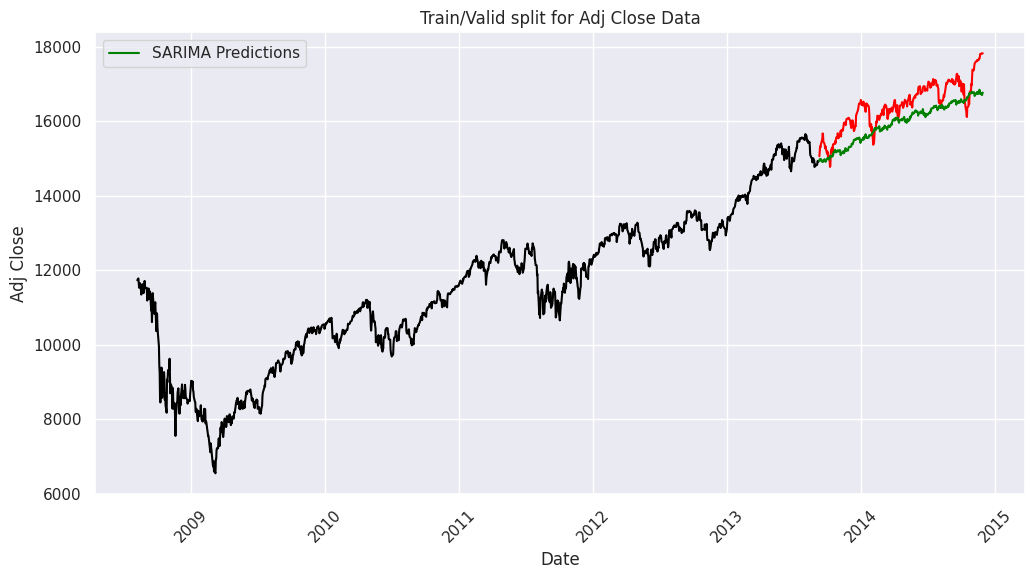

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(train['Adj Close'], color = "black")
plt.plot(valid['Adj Close'], color = "red")
plt.plot(y_valid_out, color='green', label = 'SARIMA Predictions')
plt.legend()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Valid split for Adj Close Data")
plt.show()